# More detailed optimization example (finding the solution by iteration)

There are costs associated with waiting times. In addition, the operation of the system costs money depending on the time. Each successfully served client brings in a fixed profit. The number of orders accepted per day can be controlled.

## Importing modules

In [1]:
# Processing results arrays
import numpy as np

# Simulator
from queuesim import Simulator
from queuesim.tools import SimProcess, run_parallel

# Station types
from queuesim.stations import Source, Process, Dispose
from queuesim.models import mmc_model

# Plot model
import matplotlib.pyplot as plt
import seaborn as sns

# Defining general plot style
sns.set()

## Model parameters

In [2]:
# Arrivals to be simulated
count = 100_000

# Service process
mean_S = 80
c = 1

# Costs
profit_per_client = 100  # Revenue per customer served
cost_waiting = 0.02  # Costs per waiting second
operation_cost_per_second = 0.5

## Definition of the $x$ range (=Zwischenankunftszeiten)

In [3]:
mean_I_range = range(81, 141)

## Parallel simulation of the models

In [4]:
models, simulators = run_parallel([SimProcess(mmc_model(mean_I, mean_S, c, count)) for mean_I in mean_I_range])

60 parallel processes started.
All processes terminated, runtime: 20.9 seconds.
Results have been collected.


## Processing results

In [5]:
# Utilization of the operators
rho = np.array([model['meanS'] / model['meanI'] / model['c'] for model in models])

# Mean waiting times
waiting_times = np.array([model['Dispose'].statistic_client_waiting.mean for model in models])

# Served client per day
clients_per_day = np.array([model['Source'].count / model['Process'].statistic_wip.time * 86400 for model in models])

# Revenue per client
yield_per_client = profit_per_client - waiting_times * cost_waiting

# Revenue per day
yield_per_day = clients_per_day * yield_per_client - operation_cost_per_second * 86400

## Output of results

In [6]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

[Text(0.5, 1.0, 'Revenue as a function of the utilization of the operators'),
 Text(0.5, 0, 'Utilization $\\rho$'),
 Text(0, 0.5, 'Revenue')]

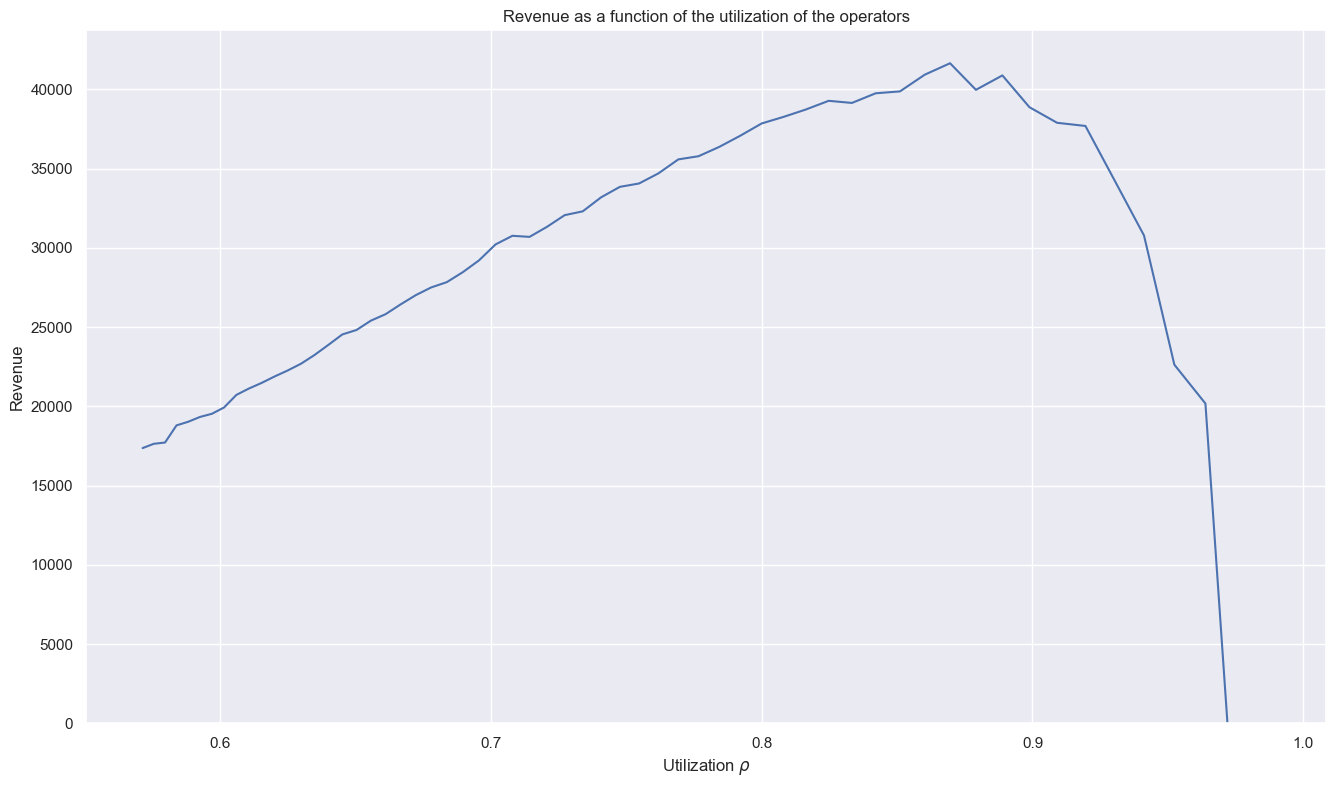

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(rho, yield_per_day)
ax.set_ylim(0, max(yield_per_day) * 1.05)
ax.set(title="Revenue as a function of the utilization of the operators", xlabel="Utilization $\\rho$", ylabel="Revenue")

In [8]:
print("Cost-optimal utilization of the operators: \N{greek small letter rho}=", round(rho[np.argmax(yield_per_day)] * 100, 1), "%")
print("Analyzed range:", round(min(rho) * 100, 1), "% ...", round(max(rho) * 100, 1), "%")

Cost-optimal utilization of the operators: ρ= 87.0 %
Analyzed range: 57.1 % ... 98.8 %
